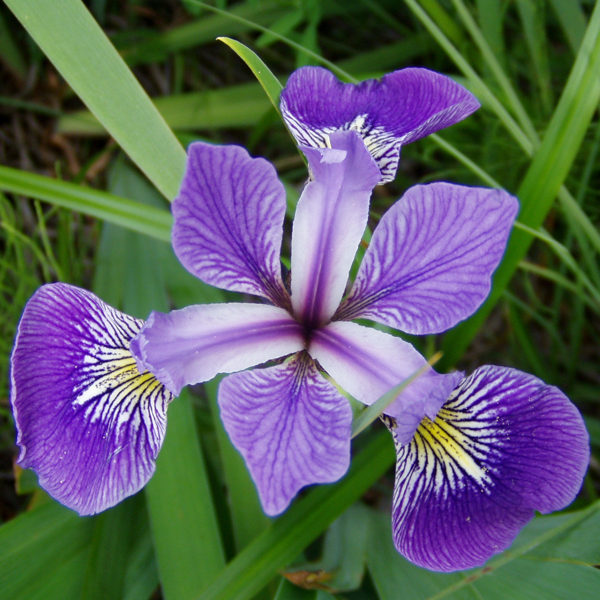

In [1]:

from IPython.display import Image
Image(filename=r"C:\Users\Abhishek\ML-Internship\dataset-card.jpg",height=200,width=200)


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns

In [3]:
#iterate warning

import warnings
warnings.filterwarnings('ignore')

In [4]:
iris=datasets.load_iris()

data=pd.DataFrame(iris['data'],columns=['Petal length','Petal Width','Sepal length','Sepal width'])
data.head()


,Petal length,Petal Width,Sepal length,Sepal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
data['Species']=iris['target']

data['Species']=data['Species'].apply(lambda x:iris['target_names'][x])

data.head()

,Petal length,Petal Width,Sepal length,Sepal width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
print(data.columns)


Index(['Petal length', 'Petal Width', 'Sepal length', 'Sepal width',
       'Species'],
      dtype='object')


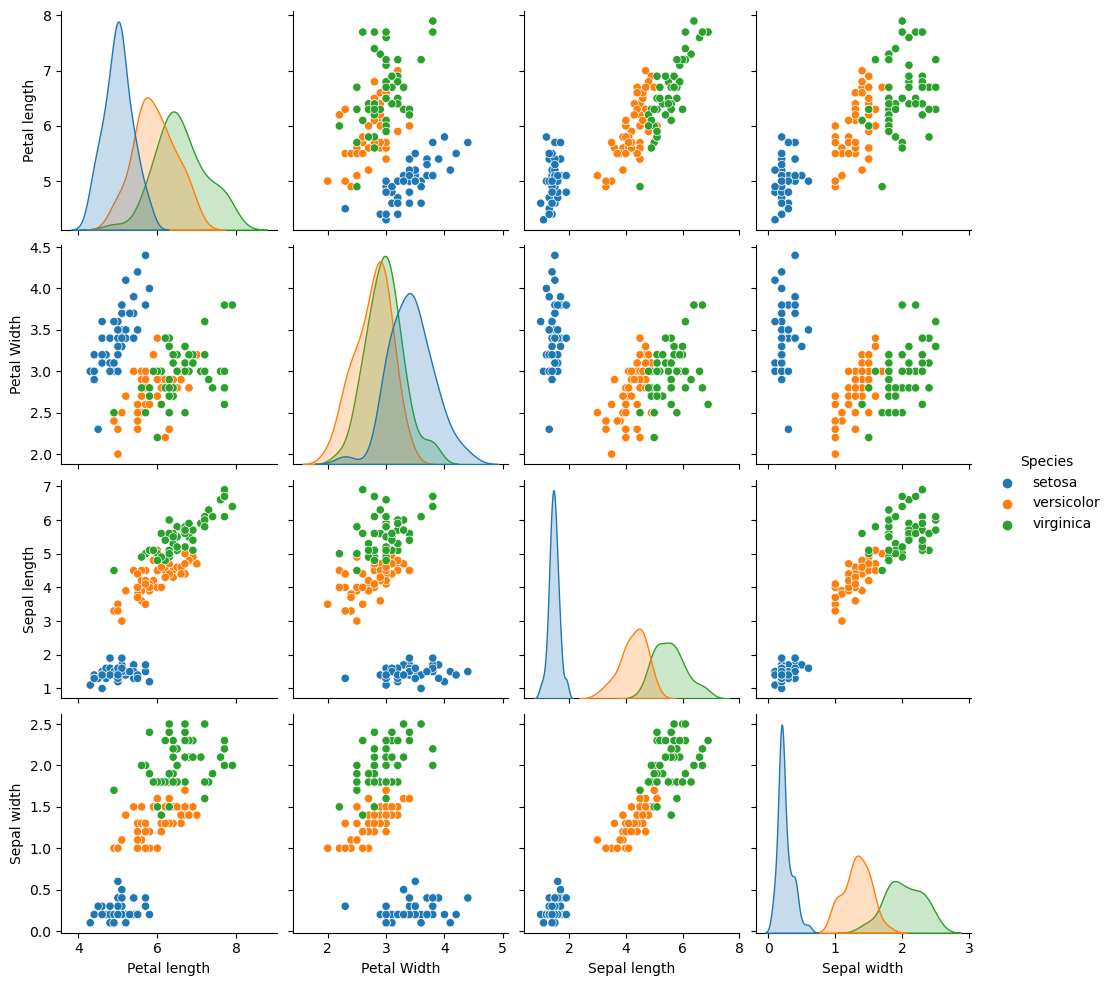

In [7]:
sns.pairplot(data, hue='Species')
plt.show()

[]

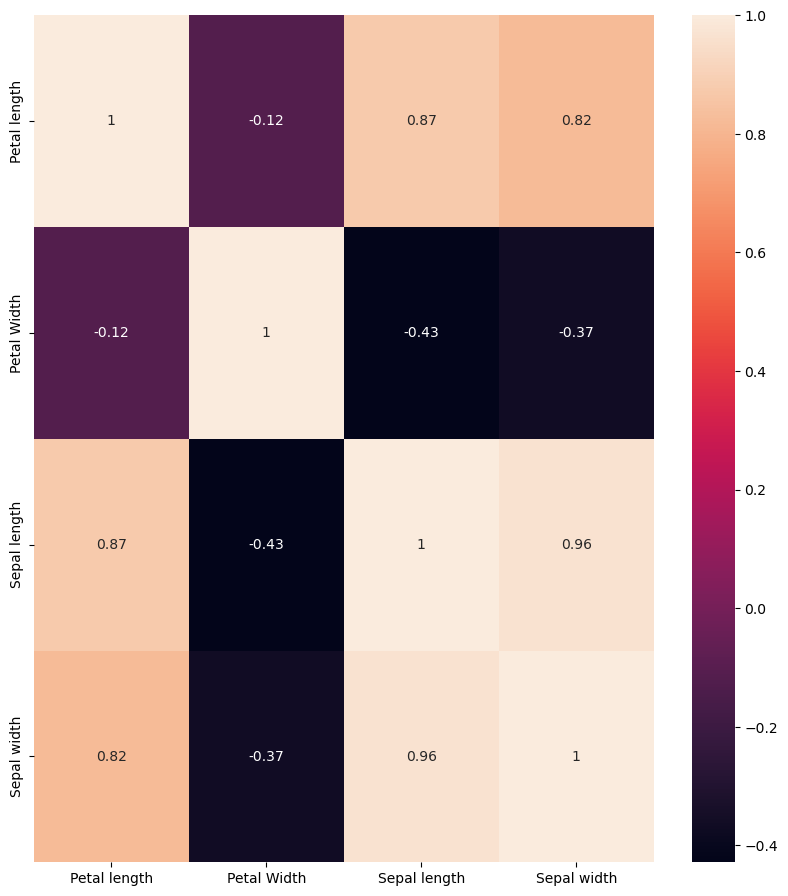

In [8]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True)
plt.plot()


<Axes: xlabel='Species', ylabel='Petal Width'>

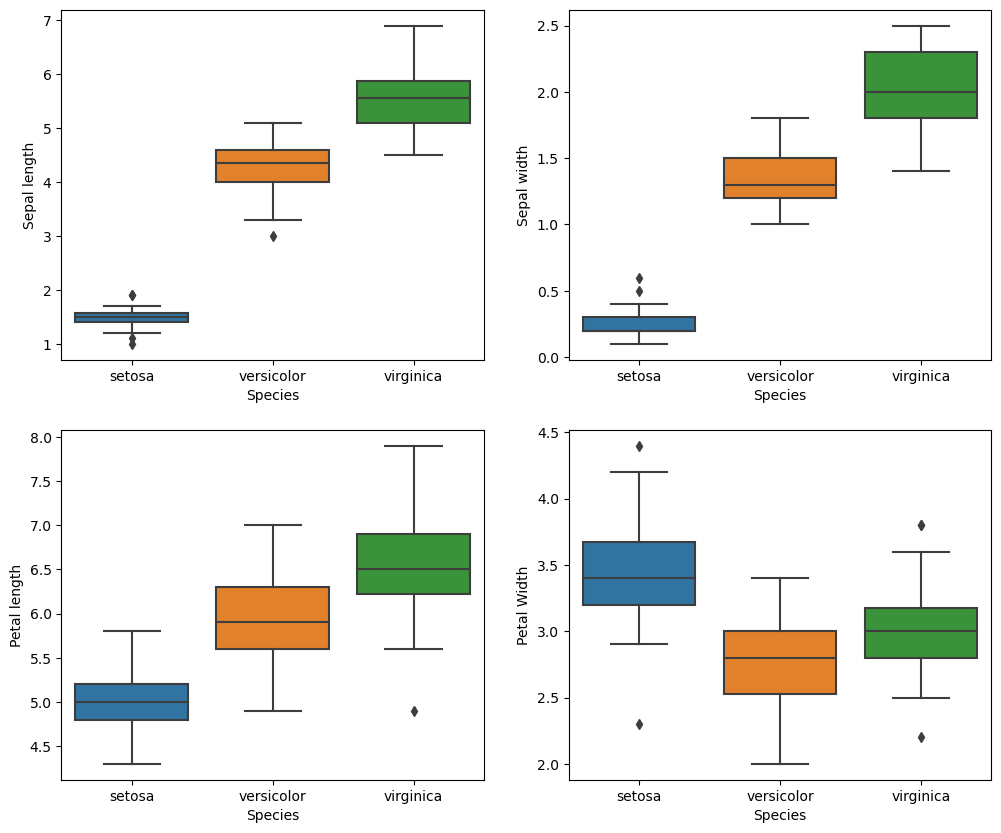

In [9]:
#Categorical feature "Species" is distributed all other 4 input variables

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="Sepal length",data=data)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="Sepal width",data=data)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="Petal Width",data=data)


In [10]:
#Preparing data for model building 
from sklearn.model_selection import train_test_split

train,test=train_test_split(data,test_size=0.3)

In [11]:
train_X=train[['Sepal length','Sepal width','Petal length','Petal Width']]
train_Y=train.Species

In [12]:
test_X=test[['Sepal length','Sepal width','Petal length','Petal Width']]
test_Y=test.Species

In [13]:
#Importing decision tree from sklearn to build classification model

from sklearn.tree import DecisionTreeClassifier 

DT= DecisionTreeClassifier(random_state=12)
model=DT.fit(train_X,train_Y)

In [14]:
DT.predict(test_X)

array(['versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [15]:
#Check the accuracy of model built

DT.score(train_X,train_Y)

1.0

In [16]:
DT.score(test_X,test_Y)

0.9333333333333333

In [17]:
y_pred=DT.predict(test_X)

In [18]:
from sklearn import metrics

print("Accuracy Score:",metrics.accuracy_score(test_Y,y_pred))

Accuracy Score: 0.9333333333333333


In [19]:
#Visualization f the decision tree

In [20]:
import sys
import six
sys.modules['sklearn.externals.six']=six

In [21]:
#import necessary libraries
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

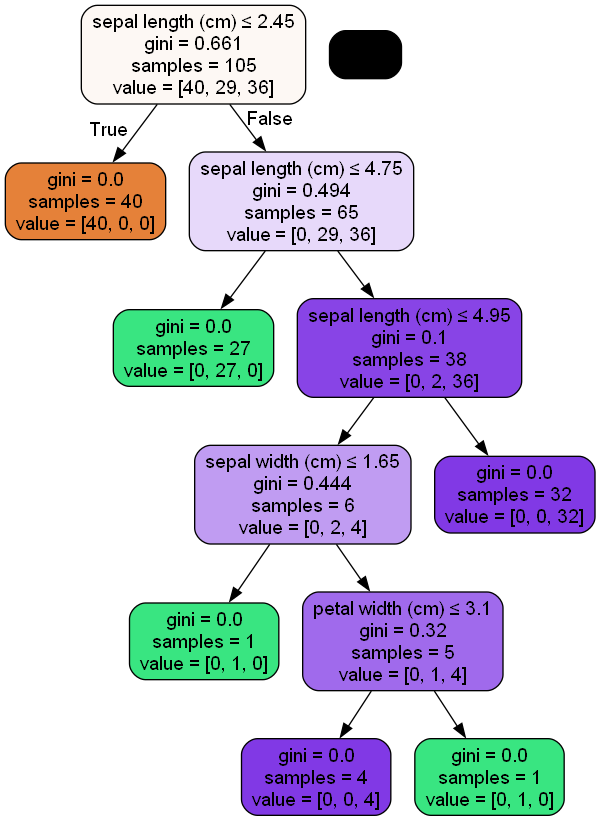

In [23]:
#Visualize the graph
dot_data=StringIO()
export_graphviz(DT,out_file=dot_data,feature_names=iris.feature_names,
                   filled=True, rounded=True,
                    special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [25]:
DT.predict([[3.5,1.9,5.2,2.4]])

array(['versicolor'], dtype=object)

In [26]:
DT.predict([[4.6,2.9,3.6,5.9]])

array(['versicolor'], dtype=object)